# Logistic Regression using Gradient Descent (Part 5) =>

In [108]:
from sklearn.datasets import make_classification
import numpy as np

X , y = make_classification(n_samples = 100 , n_features = 2 , n_informative =1 , n_redundant =0 , n_classes = 2 , n_clusters_per_class = 1, random_state = 41 , hypercube = False ,class_sep = 20)

### n_samples=100, Generate 100 total data points
### n_features=2, Each data point will have 2 features (i.e., X has shape (100, 2))
### n_informative=1, Only 1 feature actually helps in classifying (i.e., separating class 0 and class 1)
### n_redundant=0, No redundant/correlated features are added
### n_classes=2, Two output classes: 0 and 1
### n_clusters_per_class=1,	Each class will form 1 cluster in the feature space
### random_state=41	, Sets a fixed seed for random number generation — so results are reproducible
### hypercube=False, Do not place clusters inside a hypercube (they are placed linearly)
### class_sep=10, Set a large separation between class clusters (more separable = easier to classify)

In [3]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [5]:
import matplotlib.pyplot as plt

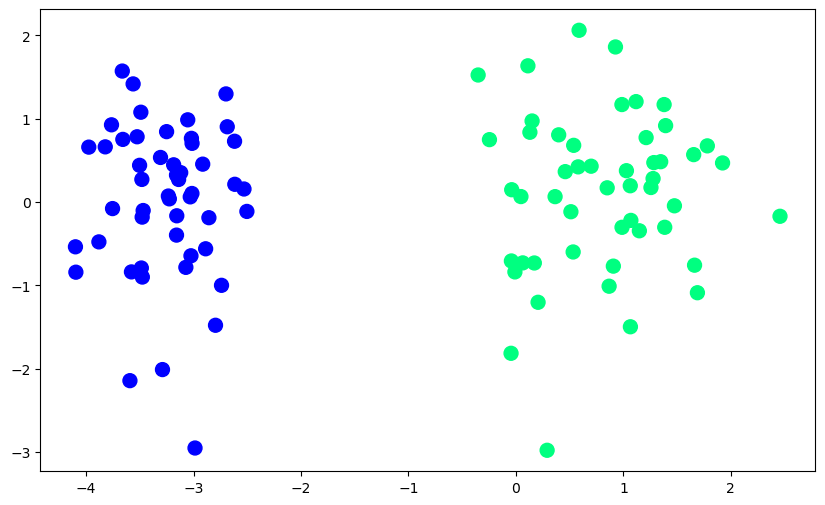

In [53]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1] , c=y , cmap="winter" , s =100)

# c=y => The color of each point is determined by corresponding value in array y (could be class labels or continuous values)
# cmap="winter" => 	Color map → Uses "winter" colormap (gradient from blue to green) to assign colors
# s=100	Size of each scatter point is 100

In [11]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(penalty = None , solver = 'lbfgs')
lor.fit(X, y)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
print(lor.coef_)
print(lor.intercept_)

[[6.16133467 0.42668242]]
[7.89840729]


In [15]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [17]:
print(m1)
print(b1)

-14.440094814050159
[-18.51120841]


In [19]:
# In values ko use karke Line Segment plot karenge =>  

x_input = np.linspace(-3, 3,100)
y_input = m1 * x_input + b1

## Sigmoid Function =>

In [39]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [152]:
X = np.insert(X , 0 , 1, axis =1)
X

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [154]:
weights = np.ones(X.shape[1])
weights

array([1., 1., 1.])

In [156]:
y_hat = sigmoid(np.dot(X,weights))
y_hat

array([0.80127081, 0.5822487 , 0.56202579, 0.01337175, 0.93969136,
       0.20185952, 0.19583351, 0.90060025, 0.8178616 , 0.12937384,
       0.03299885, 0.06539521, 0.15565991, 0.9651967 , 0.14902358,
       0.89368796, 0.6079254 , 0.03176358, 0.8772805 , 0.07099924,
       0.08978997, 0.13740783, 0.12864022, 0.96743094, 0.188396  ,
       0.97784515, 0.03631753, 0.06064122, 0.02565295, 0.11286055,
       0.13370738, 0.87025227, 0.90180277, 0.88278354, 0.7017403 ,
       0.53761163, 0.31362412, 0.95913467, 0.14519277, 0.86392146,
       0.06476386, 0.19723094, 0.25587262, 0.96936535, 0.16562806,
       0.96475427, 0.86094709, 0.05435935, 0.0364124 , 0.29128548,
       0.71751892, 0.7516917 , 0.14585444, 0.91908833, 0.96391891,
       0.10086454, 0.94429569, 0.05557222, 0.12248378, 0.50042378,
       0.95186134, 0.22169609, 0.25139459, 0.94024834, 0.80663139,
       0.89777429, 0.00868752, 0.75694186, 0.19681049, 0.40115822,
       0.01912027, 0.97464125, 0.88900999, 0.0893466 , 0.97203

In [158]:
(np.dot((y - y_hat),X)/X.shape[0])

array([ 0.02532343,  0.23936018, -0.09070199])

In [160]:
lr =0.5

In [162]:
weights = weights + lr * (np.dot((y - y_hat),X)/X.shape[0])

In [164]:
weights

array([1.01266171, 1.11968009, 0.954649  ])

In [110]:
def gd(X , y):
    X = np.insert(X , 0 , 1, axis =1)
    weights = np.ones(X.shape[1])
    # Learning Rate =>
    lr = 0.5

    for i in range(100000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr * (np.dot((y - y_hat),X)/X.shape[0])
        intercept_ = weights[0]
        coef_ = weights[1:]
        
    return coef_,intercept_    

In [112]:
coef_ ,intercept_ = gd(X, y)

In [114]:
print(coef_)
print(intercept_)

[7.05385796 0.42766178]
8.938278953204687


In [116]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [118]:
print(m)
print(b)

-16.494010709173036
-20.900345530584637


In [120]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

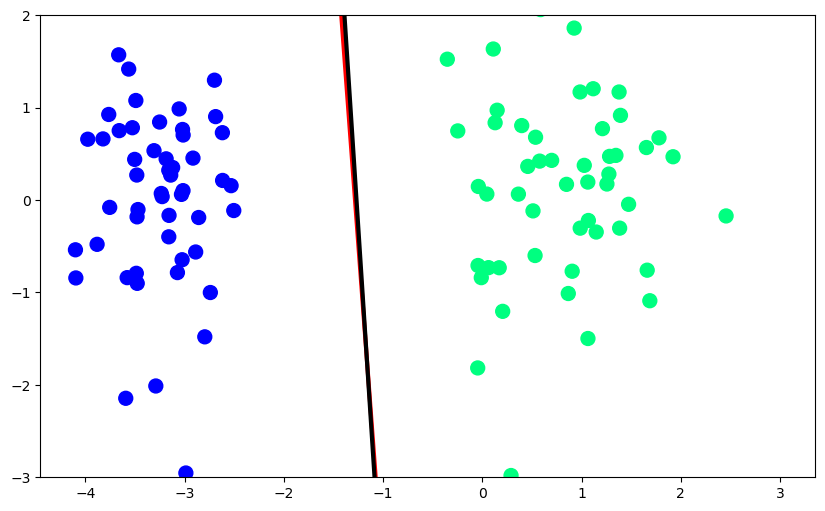

In [122]:
plt.figure(figsize = (10,6))
plt.plot(x_input , y_input,color ='red' , linewidth =3 )
plt.plot(x_input1 , y_input1,color ='black' , linewidth =3 )
plt.scatter(X[:,0],X[:,1] , c=y , cmap='winter' , s=100)
plt.ylim(-3 , 2)